In [5]:
using BijectiveHilbert
using Plots; gr()
using ImageView

In [13]:
function build_hilbert_mapping_2D(n_voxels_per_dim::Vector)

    # Mostly from https://bertvandenbroucke.netlify.app/2019/01/18/space-filling-curves/

    #Number of bits needed per dimension to represent voxels on Hilbert curve
    N_b = ceil.(Int, log2.(n_voxels_per_dim))
    #Map voxel centers to integers
    hilbert_mappings = zeros(Int, n_voxels_per_dim...)
    for i in 1:n_voxels_per_dim[1]
        for j in 1:n_voxels_per_dim[2]
                #Map voxel index into discretized space
                hilbert_mappings[i,j] = 
                    encode_hilbert(Compact(Int, N_b), [floor(Int64, ((i-1)/n_voxels_per_dim[1])*(2^N_b[1])) + 1,
                                                      floor(Int64, ((j-1)/n_voxels_per_dim[2])*(2^N_b[2])) + 1]) #*is floor the right thing to do?
        end
    end

    return hilbert_mappings
end

function spatially_sort_voxels(n_voxels_per_dim::Vector)
    N_b = ceil.(Int, log2.(n_voxels_per_dim))
    map_index = (i,j) -> [floor(Int64, ((i-1)/n_voxels_per_dim[1])*(2^N_b[1])) + 1, floor(Int64, ((j-1)/n_voxels_per_dim[2])*(2^N_b[2])) + 1]

    unmapped_indices = [[i,j] for i in 1:n_voxels_per_dim[1] for j in 1:n_voxels_per_dim[2]]
    mapped_indices = [map_index(i,j) for i in 1:n_voxels_per_dim[1] for j in 1:n_voxels_per_dim[2]]
    sorted_idxs = sortperm(mapped_indices, by = x ->  encode_hilbert(Compact(Int, N_b), x))
    # Dict(unmapped_indices[sorted_idx] => sorted_idx for sorted_idx in sorted_idxs)
    return unmapped_indices[sorted_idxs]
end


spatially_sort_voxels (generic function with 1 method)

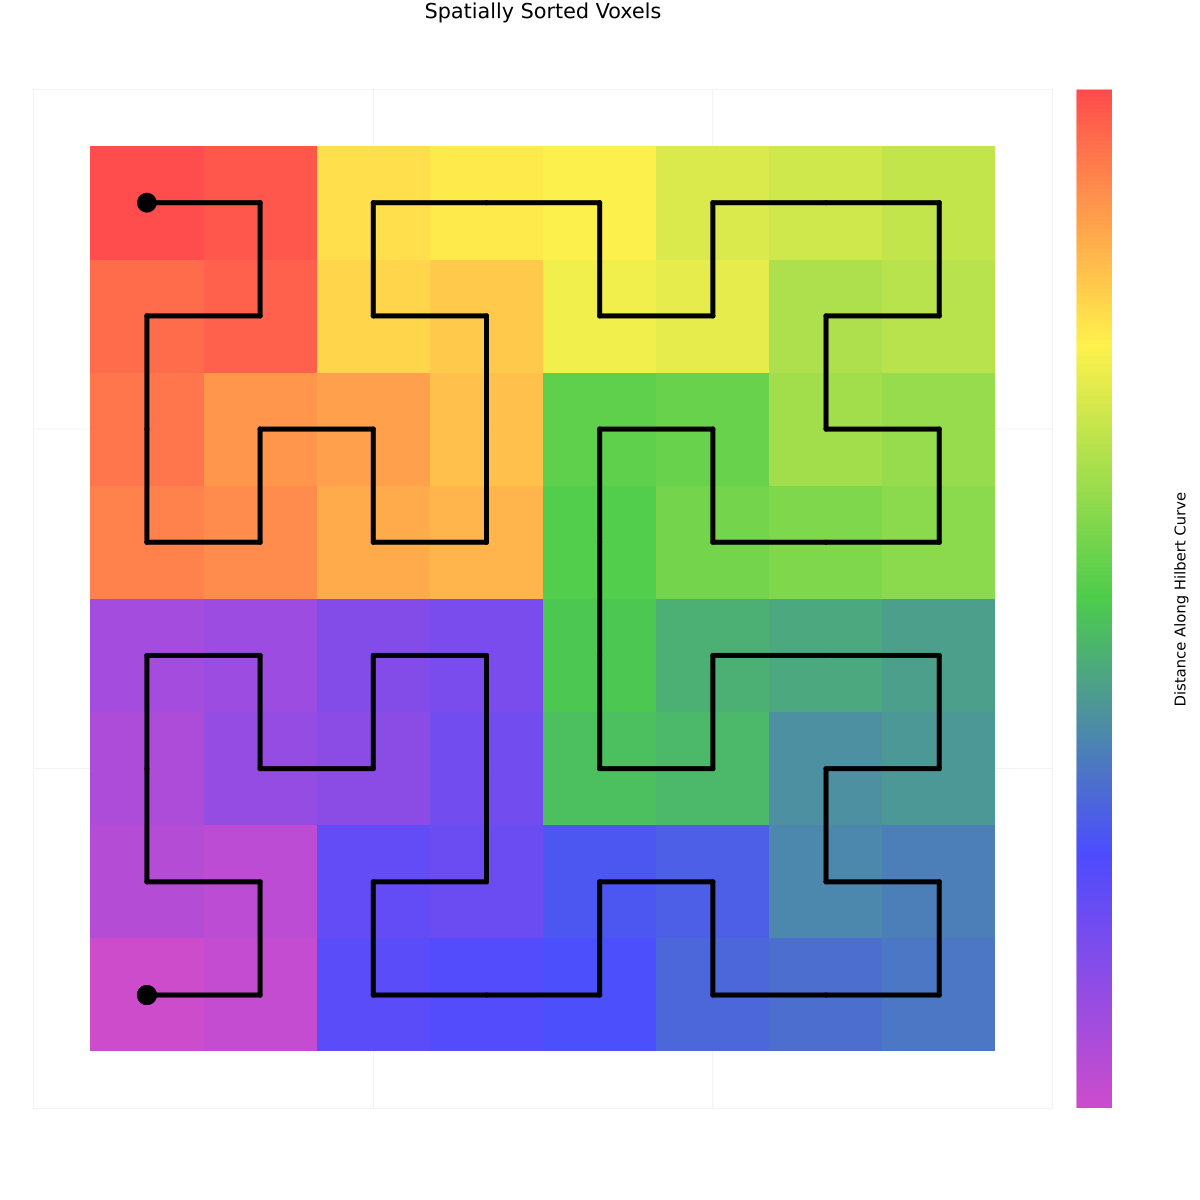

"C:\\Users\\ejmei\\Desktop\\hilbert_mapping.svg"

In [22]:
n_voxels_per_dim = [8,8]
hilbert_mapping = build_hilbert_mapping_2D(n_voxels_per_dim)
voxels_sorted = spatially_sort_voxels(n_voxels_per_dim);
h = heatmap(hilbert_mapping, color=:lightrainbow, aspect_ratio=1, z_order = 1, xaxis = false, yaxis = false,
     size = (1200,1200), colorbar_title = "Distance Along Hilbert Curve", colorbar_ticks=false)
xlims!(0,n_voxels_per_dim[2]+1)
ylims!(0,n_voxels_per_dim[1]+1)
#Draw lines on heatmap to visualize ordering better
for i in 1:length(voxels_sorted)-1
    plot!([voxels_sorted[i][2], voxels_sorted[i+1][2]], [voxels_sorted[i][1],voxels_sorted[i+1][1]],
             color = :black, lw = 7, z_order = 2, legend = false, xaxis = false, yaxis = false)
    
end
scatter!(voxels_sorted[1]', color = :black, markersize = 11, z_order = 5, label = "Start")
scatter!(voxels_sorted[end]', color = :black, markersize = 11, z_order = 4, label = "End")
title!("Spatially Sorted Voxels")
display(h)
savefig("C:/Users/ejmei/Desktop/hilbert_mapping.svg")


In [34]:
hilbert_mapping

11×11 Matrix{Int64}:
   1    4    5   59   60   64   65   79   80   84   85
   2    3    8   58   57   63   68   78   77   83   88
  15   14    9   55   56   50   69   73   76   94   89
  17   18   31   33   34   48  123  119  118  100  101
  20   19   30   36   35   45  124  120  117   99  104
  22   23   26   38   39   43  128  114  113  109  108
 235  234  231  219  218  214  129  143  144  148  149
 237  238  227  221  222  212  133  137  140  158  153
 240  239  226  224  223  209  134  138  139  157  156
 242  243  248  202  201  207  188  184  181  163  168
 255  254  249  199  200  194  189  179  180  174  169

2-element Vector{Vector{Int64}}:
 [2, 1]
 [1, 1]